In [1]:
import os

from skimage.io import imread
from skimage.transform import resize

# Data Preparation

In [2]:
fish_directories = "Dataset_FreshDa"
fish_categories = ["BangusFresh", "BangusNotFresh", "GalunggongFresh", "GalunggongNotFresh", "Tilapia"]

In [3]:
import numpy as np

fish_image = []
fish_category = []

for category_index, category in enumerate(fish_categories):
    for file in os.listdir(os.path.join(fish_directories, category)):
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            img_path = os.path.join(fish_directories, category, file)
            img = imread(img_path)
            img = resize(img, (300, 300)) #size of the image depends on the programmer decision
            fish_image.append(img.flatten()) #image.flatten will convert the image in matrix form or in array form
            fish_category.append(category_index)

fish_image = np.asarray(fish_image)
fish_category = np.asarray(fish_category)

## Trains/Test Split

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fish_image, fish_category, test_size=0.3, shuffle=True, stratify=fish_category)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

classifier = SVC()

parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}]

grid_search = GridSearchCV(classifier, parameters)

grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}])

In [7]:
from sklearn.metrics import accuracy_score

best_estimator = grid_search.best_estimator_ #will find the best combination of hyperparamters

y_prediction = best_estimator.predict(x_test) #using the best combination of hyperparamters it will predict the categories of image that is set for testing

score = accuracy_score(y_prediction, y_test) #it will compare the predicted category to the original category of the images from x_test

0.9805555555555555


## Testing Dataset

In [10]:
import pandas as pd

# Create a dictionary with column names as keys and arrays as values
data = {'Fish Image': x_test.tolist(),
        'Fish Classification': y_test.tolist(),
        'Fish Prediction': y_prediction.tolist()}

# Create a pandas dataframe from the dictionary
df = pd.DataFrame(data)


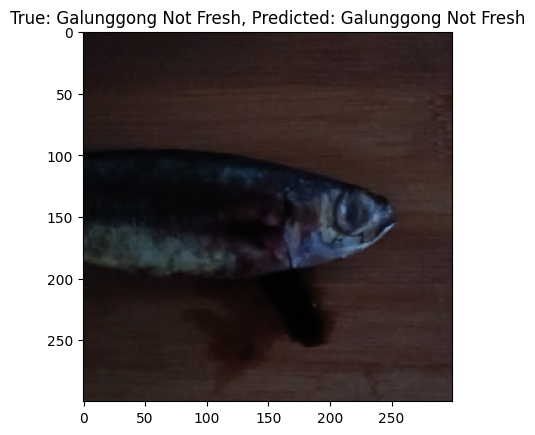

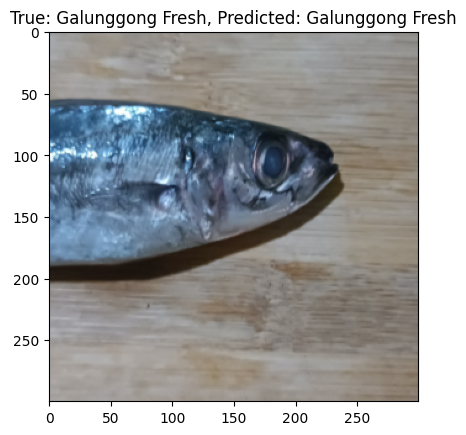

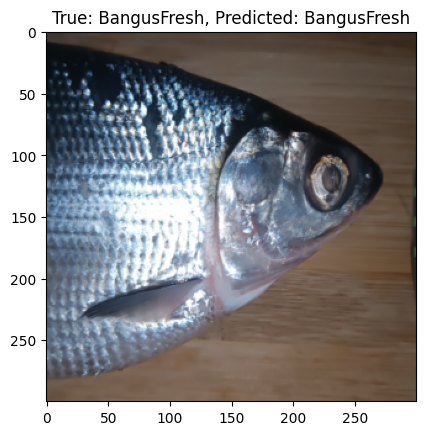

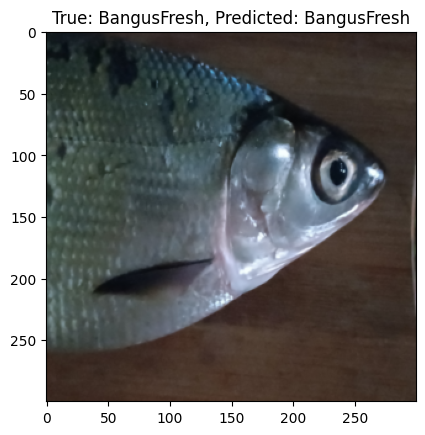

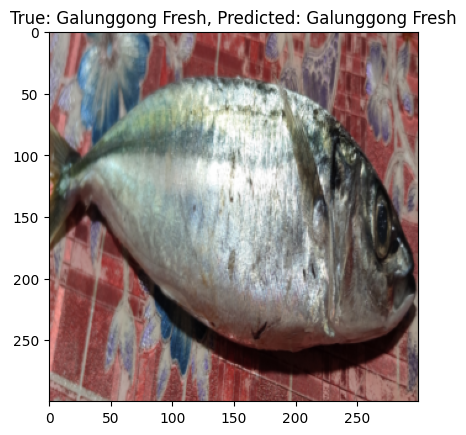

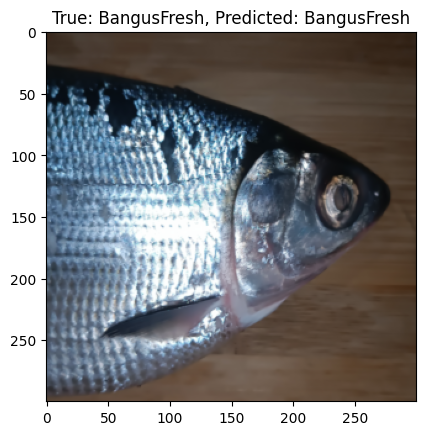

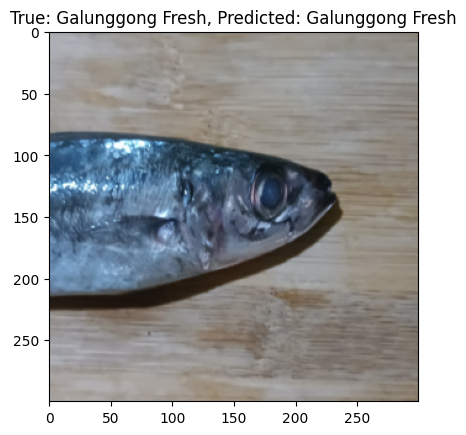

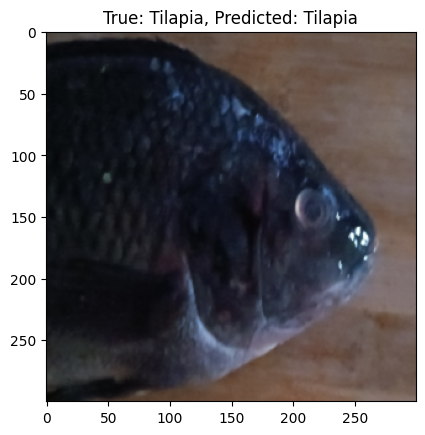

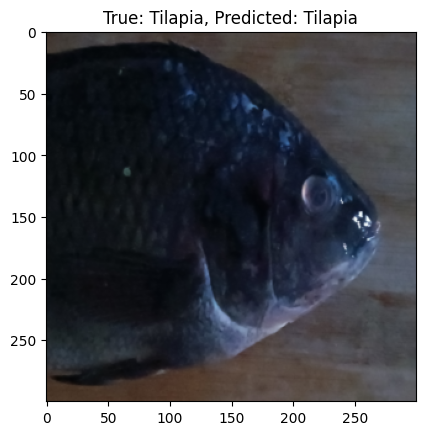

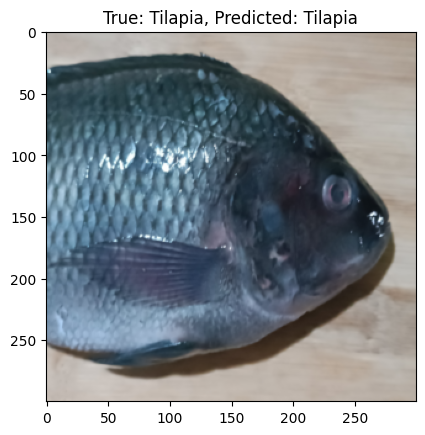

In [28]:
import matplotlib.pyplot as plt

num_samples = 10
indices = np.random.choice(x_test.shape[0], num_samples, replace=False)

for i in indices:
    img = x_test[i].reshape((300, 300, 3))
    true_label = fish_categories[y_test[i]]
    predicted_label = fish_categories[y_prediction[i]]
    plt.imshow(img)
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.show()


## Create A Model

In [29]:
import pickle

pickle.dump(best_estimator, open('./FreshDa-SVC-Classifier-GridSearchCV.p', 'wb'))